In [85]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader   #包装可迭代的数据
import torch.utils.data as Data 

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

In [86]:
label=np.genfromtxt('image_data_label_1_1.csv',delimiter=',')
label=label.reshape((7077,1))   #设置格式
print(label.shape)
label=torch.from_numpy(label)   #将numpy转为tensor
label=label.to(torch.float32)

(7077, 1)


In [87]:
label[0].shape

torch.Size([1])

In [88]:
interaction_image=np.genfromtxt('image_data_1_1.csv',delimiter=',')
interaction_image=interaction_image.reshape((7077,1,32,32))
print(interaction_image.shape)
interaction_image=torch.from_numpy(interaction_image)
interaction_image=interaction_image.to(torch.float32)
print(type(interaction_image))

(7077, 1, 32, 32)
<class 'torch.Tensor'>


In [89]:
#将图像和标签拼接为一个数据集，以便进行批处理
datasets=Data.TensorDataset(interaction_image,label)

In [90]:
datasets.tensors

(tensor([[[[0., 0., 3.,  ..., 0., 0., 0.],
           [0., 0., 5.,  ..., 0., 0., 0.],
           [1., 1., 1.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 1., 2., 1.],
           [0., 0., 0.,  ..., 0., 1., 0.],
           [0., 0., 0.,  ..., 0., 1., 1.],
           ...,
           [0., 1., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[1., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [91]:
datasets.tensors[0][0].sum()

tensor(1173.)

In [92]:
datasets.tensors[0][23][0]

tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [3., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])

In [93]:
#划分训练集测试集   这里暂时使用8:2的划分，后续进行修改
train_size=round(1*interaction_image.shape[0])
test_size=interaction_image.shape[0]-train_size
#test_size=round(0.1*interaction_image.shape[0])
#valid_size=interaction_image.shape[0]-train_size-test_size
#print(train_size,test_size,valid_size)
print(train_size,test_size)
train_dataset,test_dataset=Data.random_split(datasets,[train_size,test_size])
#train_dataset,test_dataset,valid_dataset=Data.random_split(datasets,[train_size,test_size,valid_size])


7077 0


In [94]:
for i in train_dataset:
    print(i)

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[2., 2., 1.,  ..., 3., 3., 3.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[ 2.,  7., 10.,  ...,  0.,  0.,  0.],
         [ 2.,  3.,  4.,  ...,  0.,  0.,  0.],
         [ 0.,  1.,  1.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[1., 0., 1.,  ..., 1., 0., 1.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 2.,  ..., 0., 0., 0.],
         [1., 1., 2.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 3.,  ..., 0., 0., 0.],
         [1., 2., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[5., 3., 1.,  ..., 0., 0., 0.],
         [3., 5., 1.,  ..., 0., 0., 0.],
         [6., 6., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [2., 0., 0.,  ..., 0., 0., 0.],
         [2., 4., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 

(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]]), tensor([1.]))
(tensor([[[1., 1., 0.,  ..., 0., 0., 0.],
         [1., 3., 1.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[23., 31., 20.,  ...,  0.,  0.,  0.],
         [ 3., 31., 29.,  ...,  0.,  0.,  0.],
         [ 2., 12., 10.,  ...,  0.,  0.,  0.],
         ...,
         [

(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 2., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 2., 3.,  ..., 0., 0., 0.],
         [0., 1., 3.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         [2., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[13., 30., 19.,  ...,  0.,  0.,  0.],
         [ 7., 28., 42.,  ...,  0.,  0.,  1.],
         [ 5., 27., 35.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  1.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[4., 3., 2.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 1., 0., 0.],
      

(tensor([[[1., 0., 3.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 2., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 1., 1.,  ..., 0., 0., 1.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 5.,  7.,  7.,  ...,  0.,  0.,  0.],
         [ 5.,  8., 12.,  ...,  0.,  0.,  0.],
         [ 2.,  6.,  9.,  ...,  0.,  0.,  0.],
         ...,
         [

(tensor([[[17.,  2.,  0.,  ...,  0.,  0.,  0.],
         [23.,  2.,  0.,  ...,  0.,  0.,  0.],
         [42.,  9.,  5.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  1.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  1.,  0.,  0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         [0., 2., 1.,  ..., 0., 0., 0.],
      

(tensor([[[0., 2., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[3., 0., 0.,  ..., 0., 0., 0.],
         [2., 1., 1.,  ..., 0., 0., 0.],
         [3., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[13., 34., 28.,  ...,  1.,  0.,  0.],
         [ 5., 12., 26.,  ...,  0.,  0.,  0.],
         [ 0.,  4.,  8.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[2., 2., 2.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 4., 2.,  ..., 0., 0., 0.],
         [0., 2., 2.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[22.,  7.,  5.,  ...,  0.,  0.,  0.],
         [32., 16.,  9.,  ...,  0.,  0.,  0.],
         [44., 23., 12.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 1.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[3., 0., 1.,  ..., 0., 0., 0.],
         [5., 1., 0.,  ..., 0., 0., 0.],
         [3., 1., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [2., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 4.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 

(tensor([[[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [2., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[462.,  49.,  32.,  ...,   0.,   0.,   0.],
         [ 27.,  38.,  23.,  ...,   0.,   0.,   0.],
         [  5.,  10.,  12.,  ...,   0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]]), tensor([1.]))
(tensor([[[2., 3., 1.,  ..., 0., 0., 0.],
         [5., 1., 2.,  ..., 0., 0., 0.],
         [4., 5., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 2., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0

(tensor([[[1., 2., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 1., 0.,  ..., 0., 0., 0.],
         [3., 1., 1.,  ..., 0., 0., 0.],
         [2., 3., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[3., 0., 0.,  ..., 0., 0., 0.],
         [0., 3., 0.,  ..., 0., 0., 0.],
         [2., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[1., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[3., 0., 7.,  ..., 0., 0., 0.],
         [2., 5., 5.,  ..., 0., 0., 0.],
         [3., 9., 7.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 8.,  8.,  5.,  ...,  0.,  0.,  1.],
         [ 1., 14., 28.,  ...,  0.,  0.,  0.],
         [ 0.,  1., 12.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
      

(tensor([[[1., 1., 0.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 4., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 3.,  8.,  6.,  ...,  0.,  0.,  1.],
         [ 3.,  8., 15.,  ...,  0.,  0.,  0.],
         [ 4., 11., 14.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [2., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 2., 0.],
         [0., 0., 0.,  ..., 1., 0., 1.],
         [0., 0., 0.,  ..., 0., 1., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 9.,  4.,  0.,  ...,  0.,  0.,  0.],
         [12.,  7.,  4.,  ...,  0.,  0.,  0.],
         [18., 17.,  9.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  1.,  2.,  2.],
         [ 0.,  0.,  0.,  ...,  1.,  2.,  1.],
         [ 0.,  0.,  0.,  ...,  0.,  2.,  2.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
      

(tensor([[[1., 0., 1.,  ..., 0., 0., 0.],
         [1., 0., 4.,  ..., 0., 0., 0.],
         [0., 1., 4.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[1., 1., 1.,  ..., 0., 0., 0.],
         [2., 1., 1.,  ..., 0., 0., 0.],
         [0., 3., 4.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 3., 2.,  ..., 0., 0., 0.],
         [7., 2., 2.,  ..., 0., 0., 0.],
         [2., 3., 7.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[30.,  9.,  2.,  ...,  0.,  0.,  0.],
         [13., 14., 12.,  ...,  0.,  0.,  0.],
         [12., 25., 14.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 1.,  1.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 5., 15.,  1.,  ...,  0.,  0.,  0.],
         [ 0., 13., 13.,  ...,  0.,  0.,  1.],
         [ 0., 21., 27.,  ...,  1.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [2., 2., 1.,  ..., 0., 0., 0.],
         [1

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[2., 1., 2.,  ..., 0., 0., 0.],
         [0., 2., 4.,  ..., 0., 0., 0.],
         [0., 0., 6.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 

(tensor([[[25., 44., 54.,  ...,  0.,  0.,  0.],
         [ 8., 23., 23.,  ...,  0.,  0.,  0.],
         [ 2.,  8., 20.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[1., 2., 0.,  ..., 0., 1., 0.],
         [1., 0., 4.,  ..., 2., 2., 0.],
         [0., 0., 1.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 1., 1.,  ..., 0., 0., 0.],
         [1., 4., 3.,  ..., 0., 0., 0.],
         [4., 3., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 4.,  4., 15.,  ...,  0.,  0.,  1.],
         [ 1.,  3.,  8.,  ...,  0.,  0.,  0.],
         [ 1.,  1.,  2.,  ...,  0.,  0.,  0.],
         ...,
         [

(tensor([[[0., 0., 0.,  ..., 1., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 1., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [3., 2., 1.,  ..., 0., 0., 0.],
         [1., 2., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[3., 2., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 1., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[11., 11.,  8.,  ...,  0.,  0.,  0.],
         [ 9., 34., 41.,  ...,  0.,  0.,  1.],
         [12., 30., 44.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[0., 0., 2.,  ..., 0., 1., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 1., 0.],
         [1., 0., 0.,  ..., 2., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[3., 5., 8.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[2., 1., 0.,  ..., 0., 0., 0.],
         [1., 1., 3.,  ..., 0., 0., 0.],
         [0., 3., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[17., 27., 22.,  ...,  0.,  0.,  0.],
         [ 9., 23., 51.,  ...,  0.,  0.,  0.],
         [ 5., 23., 21.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 1., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[1., 1., 0.,  ..., 0., 0., 0.],
         [1., 2., 1.,  ..., 0., 0., 0.],
         [3., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 1., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 2., 2., 2.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 4.,  ..., 0., 0., 0.],
         [2., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[31.,  6.,  2.,  ...,  0.,  0.,  0.],
         [54., 22.,  8.,  ...,  0.,  0.,  0.],
         [60., 19., 13.,  ...,  0.,  0.,  0.],
         ...,
         [ 1.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  1.,  ...,  0.,  0.,  0.],
         [ 2.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[ 7., 12.,  8.,  ...,  0.,  0.,  0.],
         [ 7., 17., 25.,  ...,  0.,  0.,  0.],
         [15., 20., 22.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[1., 2., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0

In [95]:
#将数据集作为参数传递给DataLoader。这在我们的数据集上包裹了一个可迭代的数据集，并支持自
#动批处理、采样、洗牌和多进程数据加载。在这里，我们定义了一个64的批处理大小，即dataloader可
#迭代的每个元素将返回一个批次，包括64个元素的特征和标签。
batch_size=32
#创建数据加载器，也就是迭代器，分批次
train_dataloader=DataLoader(train_dataset,batch_size=batch_size)
test_dataloader=DataLoader(test_dataset,batch_size=batch_size)
#valid_dataloader=DataLoader(valid_dataset,batch_size=batch_size)


#用所有的数据进行训练试一下
#train_dataloader2=DataLoader(datasets,batch_size=batch_size)

In [96]:
for X,y in test_dataloader:
    print(X)
    print("X[N,C,H,W]的形状：",X.shape)
    print("y的形状:", y.shape,y.dtype)
    break;    #查看一个批次


In [146]:
#用pytorch构建神经网络
#为了在PyTorch中定义一个神经网络，我们创建一个继承自nn.Module的类。我们在init函数中定义网络
#的层，并在forward函数中指定数据将如何通过网络。为了加速神经网络的操作，如果有GPU的话，我
#们把它移到GPU上

device="cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class CnncNet(nn.Module):
    def __init__(self):
        super(CnncNet,self).__init__()
        #self.flatten=nn.Flatten()
        self.conv=nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1),    # 输入(1,1,32,32)     输出 (1,32,32,32)  第一个1代表批量大小
            nn.ReLU(),   
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=(3,3)),     #输入(1,32,32,32)  输出(1,32,30,30)
            nn.ReLU(),
            nn.MaxPool2d(2,2),         #输出 (1,32,15,15)
            nn.Dropout2d(0.25),        ## 表示每个神经元有0.25的可能性不被激活  Dropout只能用在训练部分而不能用在测试部分
    
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(3,3),padding=(1,1)),     #输入(1,32,15,15)  #输出(1,64,15,15)
            nn.ReLU(),
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3)),      #输入(1,64,15,15)   输出(1,64,13,13)
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Dropout2d(0.25),
    
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),padding=(1,1)),
            nn.ReLU(),
            nn.Conv2d(in_channels=128,out_channels=128,kernel_size=(3,3)),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Dropout2d(0.25),
            nn.Flatten(),      #结果为 (1,512)
            #后续添加的层
            nn.Linear(in_features=512,out_features=512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=512,out_features=1),    #out_feaures=1是将二分类输出为一个神经元，若是必须得2个，后续在修改，标签也要修改
            nn.Sigmoid()   
            
        )
        #self.FC1=nn.Linear(512,512)
        #self.FC2=nn.Linear(512,1)
        #self.Sg=nn.Sigmoid()
        #self.Rl=nn.ReLU()
        #self.dr=nn.Dropout(0.5)
    def forward(self,x):
        logits=self.conv(x)
        #x=logits.reshape(logits.shape[0],-1)
        #x=self.FC1(x)
        #x=self.Rl(x)
        #x=self.dr(x)
        #x=self.FC2(x)
        #logits=self.Sg(x)
        
        return logits

Using cuda device


In [147]:
#创建模型
model=CnncNet().to(device)
print(model)

CnncNet(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout2d(p=0.25, inplace=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout2d(p=0.25, inplace=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Dropout2d(p=0.25, inplace=False)
    (18): Flatten(start_dim=1, end_dim=-1)
    (19): Linear(in_features=512, out_fe

In [ ]:
mpdel.

In [133]:
def show_ROC(label,pred):
    fpr,tpr,threshold = roc_curve(label, pred) ###计算真正率和假正率
    roc_auc=auc(fpr,tpr)###计算auc的值
    
    plt.figure()
    lw = 2
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()     

In [134]:
def ROC_test(ROC_data,model):
    score_list=np.array([])
    label_list=np.array([])
    model.eval()
    with torch.no_grad():
        for X,y in ROC_data:
            X,y=X.to(device),y.to(device)
            #X=torch.nn.functional.normalize(X)
            pred=model(X)
            #pred=torch.round(model(X))
            label=y.cpu().numpy()
            score=pred.cpu().numpy()
            #if score>0.5 and 1-score<0.3:
            #    score=score
            #elif score>0.5 and 1-score>=0.3:
            #    score=score-0.2
            #if score<0.5 and score-0<0.3:
            #    score=score
            #else:
            #    score=score+0.2
            label_list=np.append(label_list,values=label)
            score_list=np.append(score_list,values=score)
    print(label_list)
    print(score_list)
    show_ROC(label_list,score_list)

In [135]:
#绘制多个模型的roc曲线
def pred_label_file(ROC_data,model,K_Model_Name):  #该函数将模型的预测结果和标签保存到csv文件中，最终一起画Roc曲线
    score_list=np.array([])
    label_list=np.array([])
    model.eval()
    with torch.no_grad():
        for X,y in ROC_data:
            X,y=X.to(device),y.to(device)
            pred=model(X)
            label=y.cpu().numpy()
            score=pred.cpu().numpy()
            label_list=np.append(label_list,values=label)
            score_list=np.append(score_list,values=score)
    df=DataFrame({'label':label_list,'pred':score_list})
    s="data/{0}.csv".format(K_Model_Name)
    df.to_csv(s,index=False,sep=',')


In [136]:

#画置信柱状图
def show_bar(ROC_data,model):
    score_list=np.array([])
    label_list=np.array([])
    true_list=[0,0,0,0,0]
    false_list=[0,0,0,0,0]
    model.eval()
    with torch.no_grad():
        for X,y in ROC_data:
            X,y=X.to(device),y.to(device)
            #X=torch.nn.functional.normalize(X)
            pred=model(X)
            #pred=torch.round(model(X))
            label=y.cpu().numpy()
            score=pred.cpu().numpy()
            if score>0 and score<0.2:
                if label==0:
                    true_list[0]=true_list[0]+1
                else:
                    false_list[0]=false_list[0]+1
            elif score>=0.2 and score<0.4:
                if label==0:
                    true_list[1]=true_list[1]+1
                else:
                    false_list[1]=false_list[1]+1
            elif score>=0.4 and score<0.5:
                if label==0:
                    true_list[2]=true_list[2]+1
                else:
                    false_list[2]=false_list[2]+1
            elif score>=0.5 and score<0.6:
                if label==1:
                    true_list[2]=true_list[2]+1
                else:
                    false_list[2]=false_list[2]+1
            elif score>=0.6 and score<0.8:
                if label==1:
                    true_list[3]=true_list[3]+1
                else:
                    false_list[3]=false_list[3]+1
            else :
                if label==1:
                    true_list[4]=true_list[4]+1
                else:
                    false_list[4]=false_list[4]+1
            #if score>0.5 and 1-score<0.3:
            #    score=score
            #elif score>0.5 and 1-score>=0.3:
            #    score=score-0.2
            #if score<0.5 and score-0<0.3:
            #    score=score
            #else:
            #    score=score+0.2
            label_list=np.append(label_list,values=label)
            score_list=np.append(score_list,values=score)
    sum=true_list[0]+true_list[1]+true_list[2]+true_list[3]+true_list[4]
    print(sum)
    regions = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]
    true_1 = [true_list[0], true_list[1], true_list[2], true_list[3], true_list[4]]
    false_2 = [false_list[0], false_list[1],false_list[2],false_list[3], false_list[4]]

    fig, ax = plt.subplots(figsize=(10, 7))
    # 先创建一根柱子，显示各个区间true
    ax.bar(regions, true_1, color=[0.8,0.1,0.2], label="True_prediction")
    # 第二根柱子“堆积”在第一根柱子上方，通过'bottom'调整，显示false
    ax.bar(regions, false_2, color=[0.1,0.9,0.2], bottom=true_1, label="False_prediction")

    ax.set_title("Model probability stacked bar plot", fontsize=15)
    ax.set_xlabel("Probability interval")
    ax.set_ylabel("Sample numbers")
    ax.legend()
    plt.grid(False)
    plt.show()
    

In [137]:
#这里是为了做训练，得到当前模型的输出神经元的个数，以便确定后续的全连接的神经元的个数

x=datasets.tensors[0][0][0].reshape((1,1,32,32))
x= x.to(torch.float32)
print(x.shape)
x=x.to(device)
y=model(x)
y.shape

torch.Size([1, 1, 32, 32])


torch.Size([1, 1])

In [138]:
len(train_dataloader.dataset)

7077

In [139]:
len(train_dataloader),len(test_dataloader)#

(222, 0)

In [140]:
#模型构建后，要优化模型参数

#定义一个损失函数和优化器
#loss_fn=nn.CrossEntropyLoss()     #交叉熵损失函数
loss_fn=nn.BCELoss()     
#optimizer=torch.optim.SGD(model.parameters(),lr=1e-3)   #优化模型参数，学习率是0.001
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)    #更换这个优化器，模型提高精度显著

In [141]:
#在一个单一的训练循环中，模型对训练数据集（分批送入）进行预测，并通过反向传播预测误差来调整模型的参数

def train(dataloader,model,loss_fn,optimizer):
    size=len(dataloader.dataset)     #数据集中的数据总数，例如训练集中size是4782
    model.train()
    for batch,(X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)    #X就是image_data的批次，y就是对应批次的标签
        
        #计算预测误差
        pred=model(X)
        loss=loss_fn(pred,y)
        #反向传播
        optimizer.zero_grad()  #清空过往梯度
        loss.backward()  #反向传播，计算当前梯度
        optimizer.step() #根据梯度更新网络参数
        
        if batch %50==0: #到50的整数倍，就输出当前的损失
            loss,current=loss.item(),batch*len(X)
            print(f"loss:{loss:>7f}  [{current:>5d}/{size:>5d}]")

In [142]:
#还根据测试数据集检查模型的性能，以确保它在学习
def test(dataloader,model,loss_fn):
    size=len(dataloader.dataset)   #数据集中的行数
    num_batches=len(dataloader)    #一共有的批次数,训练集中是150，测试集是38，每一个批次有32个数据及其标签
    model.eval()
    test_loss,correct=0,0
    with torch.no_grad():  #代表张量中的元素不会自动求导，也就不会保存梯度，节省时间和空间
        for X,y in dataloader:
            X,y=X.to(device),y.to(device)
            pred=model(X)
            #print(pred)
            test_loss+=loss_fn(pred,y).item()
            correct+=(torch.abs(pred-y)<0.3).sum().item()
        test_loss/=num_batches
        correct/=size
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss:{test_loss:>8f} \n")

In [145]:
###############################交叉验证版本：将训练集分为K-1个训练集，1个验证集，结束后，用测试集画roc##############################3
kf = KFold(n_splits=5, shuffle=True, random_state=0)
epchs=3
i=0
out_loader=DataLoader(dataset=train_dataset, batch_size=32)
for t in range(epchs):
    print(f"Epoch {t+1}\n-------------------")
    for train_index, val_index in kf.split(train_dataset):   #这里是5次循环
        i=i+1
        train_fold = torch.utils.data.dataset.Subset(train_dataset, train_index)   #训练集
        #print(train_fold)
        val_fold = torch.utils.data.dataset.Subset(train_dataset, val_index)      #验证集
        #打包成DataLoader类型 用于 训练
        train_loader = DataLoader(dataset=train_fold, batch_size=32, shuffle=True)
        val_loader = DataLoader(dataset=val_fold, batch_size=32, shuffle=True)
        
        #ROC_loader=DataLoader(dataset=val_fold, batch_size=1)  #对每个测试集整体画ROC曲线
        
        train(train_loader,model,loss_fn,optimizer)
        test(val_loader,model,loss_fn)   #这里仅仅是为了看正确率，判断是否在训练
        #在验证集上画roc
        #在测试集上画roc
        ROC_loader=DataLoader(dataset=val_fold, batch_size=1)  #对每个测试集整体画ROC曲线
        out_loader=ROC_loader
        #ROC_test(ROC_loader,model)
    #ROC_test(ROC_loader,model)
print(i)#记录训练了多少次
print("done!")

Epoch 1
-------------------
loss:0.598701  [    0/ 5661]
loss:0.579270  [ 1600/ 5661]
loss:0.600112  [ 3200/ 5661]
loss:0.465806  [ 4800/ 5661]
Test Error: 
 Accuracy: 26.7%, Avg loss:0.572084 

loss:0.520881  [    0/ 5661]
loss:0.477186  [ 1600/ 5661]
loss:0.591372  [ 3200/ 5661]
loss:0.772683  [ 4800/ 5661]
Test Error: 
 Accuracy: 30.4%, Avg loss:0.547507 

loss:0.513630  [    0/ 5662]
loss:0.584448  [ 1600/ 5662]
loss:0.598207  [ 3200/ 5662]
loss:0.466418  [ 4800/ 5662]
Test Error: 
 Accuracy: 30.0%, Avg loss:0.553808 

loss:0.494433  [    0/ 5662]
loss:0.598535  [ 1600/ 5662]
loss:0.577306  [ 3200/ 5662]
loss:0.520295  [ 4800/ 5662]
Test Error: 
 Accuracy: 33.3%, Avg loss:0.542941 

loss:0.672289  [    0/ 5662]
loss:0.433721  [ 1600/ 5662]
loss:0.494061  [ 3200/ 5662]
loss:0.649071  [ 4800/ 5662]
Test Error: 
 Accuracy: 33.7%, Avg loss:0.527791 

Epoch 2
-------------------
loss:0.494666  [    0/ 5661]
loss:0.584424  [ 1600/ 5661]
loss:0.594315  [ 3200/ 5661]
loss:0.540929  [ 4800/

[0. 1. 1. ... 0. 1. 1.]
[0.50834274 0.51259786 0.7191999  ... 0.32834035 0.45214197 0.71870142]


<Figure size 640x480 with 0 Axes>

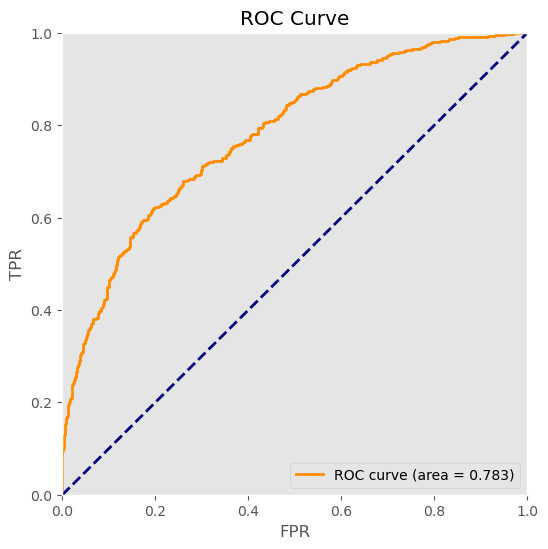

In [144]:
ROC_test(out_loader,model)


997


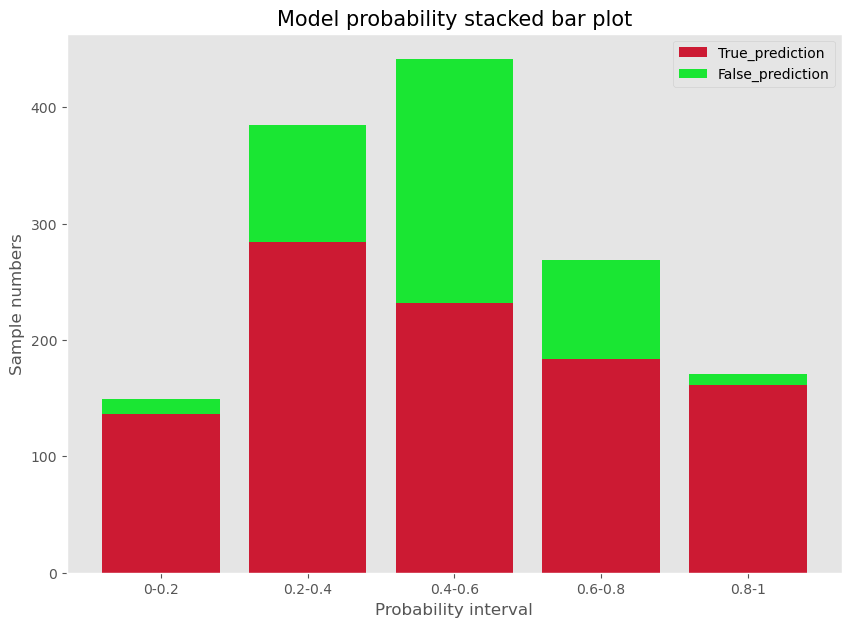

In [130]:
show_bar(out_loader,model)

Test Error: 
 Accuracy: 41.0%, Avg loss:0.983886 

[1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.


<Figure size 640x480 with 0 Axes>

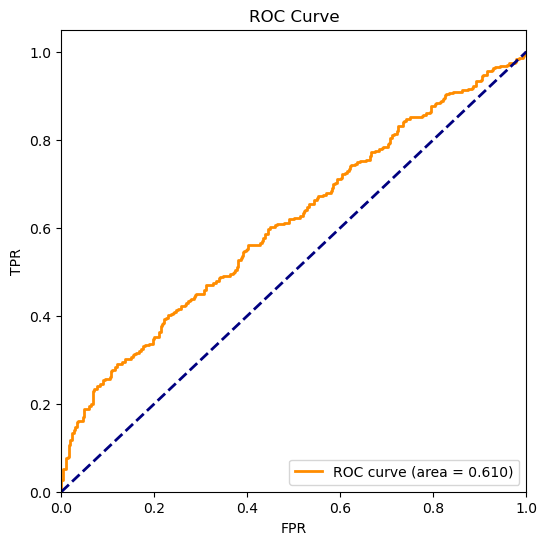

In [33]:
#测试集的精度
test_loader=DataLoader(dataset=test_dataset, batch_size=32)  #对每个测试集整体画ROC曲线
test(test_loader,model,loss_fn) 
#在测试集上画roc
ROC_loader=DataLoader(dataset=test_dataset, batch_size=1)  #对每个测试集整体画ROC曲线
ROC_test(ROC_loader,model)

In [61]:
#保存模型
torch.save(model.state_dict(),"WGCNA_CNN_2023.11.15_accuracy_80_roc_0.9.pth")
print("保存模型状态到WGCNA_CNN_2023.11.15_accuracy_80_roc_0.9.pth")

保存模型状态到WGCNA_CNN_2023.11.15_accuracy_80_roc_0.9.pth


In [47]:

#################################无交叉验证版本############################################
#训练过程是通过几个迭代（epochs）进行的。在每个epoch中，模型学习参数以做出更好的预测。我们
#在每个epoch中打印模型的准确度和损失；我们希望看到准确度在每个epoch中增加，损失在每个epoch
#中减少。
epchs=100
for t in range(epchs):
    print(f"Epoch {t+1}\n-------------------")
    train(train_dataloader,model,loss_fn,optimizer)  #每一次迭代，都会训练模型
    #train(train_dataloader2,model,loss_fn,optimizer)  #用全部数据做训练，看看效果
    test(valid_dataloader,model,loss_fn)  #每一次训练模型，都会使用验证集进行测试，评估当前模型的性能
print("done!")


Epoch 1
-------------------
loss:0.693012  [    0/10815]
loss:0.684954  [ 1600/10815]
loss:0.688758  [ 3200/10815]
loss:0.676564  [ 4800/10815]
loss:0.680394  [ 6400/10815]
loss:0.674340  [ 8000/10815]
loss:0.662900  [ 9600/10815]
Test Error: 
 Accuracy: 0.0%, Avg loss:0.663650 

Epoch 2
-------------------
loss:0.643341  [    0/10815]
loss:0.641213  [ 1600/10815]
loss:0.681017  [ 3200/10815]
loss:0.642382  [ 4800/10815]
loss:0.657554  [ 6400/10815]
loss:0.643943  [ 8000/10815]
loss:0.635024  [ 9600/10815]
Test Error: 
 Accuracy: 0.0%, Avg loss:0.636254 

Epoch 3
-------------------
loss:0.592476  [    0/10815]
loss:0.589025  [ 1600/10815]
loss:0.678676  [ 3200/10815]
loss:0.615708  [ 4800/10815]
loss:0.638529  [ 6400/10815]
loss:0.622469  [ 8000/10815]
loss:0.602078  [ 9600/10815]
Test Error: 
 Accuracy: 0.1%, Avg loss:0.603925 

Epoch 4
-------------------
loss:0.518496  [    0/10815]
loss:0.522514  [ 1600/10815]
loss:0.666453  [ 3200/10815]
loss:0.569698  [ 4800/10815]
loss:0.610721

loss:0.437592  [ 1600/10815]
loss:0.712190  [ 3200/10815]
loss:0.547721  [ 4800/10815]
loss:0.610112  [ 6400/10815]
loss:0.555347  [ 8000/10815]
loss:0.559111  [ 9600/10815]
Test Error: 
 Accuracy: 61.8%, Avg loss:0.558374 

Epoch 31
-------------------
loss:0.406566  [    0/10815]
loss:0.430493  [ 1600/10815]
loss:0.738460  [ 3200/10815]
loss:0.548749  [ 4800/10815]
loss:0.622244  [ 6400/10815]
loss:0.550664  [ 8000/10815]
loss:0.555631  [ 9600/10815]
Test Error: 
 Accuracy: 62.1%, Avg loss:0.557775 

Epoch 32
-------------------
loss:0.372391  [    0/10815]
loss:0.452075  [ 1600/10815]
loss:0.717101  [ 3200/10815]
loss:0.527923  [ 4800/10815]
loss:0.627677  [ 6400/10815]
loss:0.574873  [ 8000/10815]
loss:0.573125  [ 9600/10815]
Test Error: 
 Accuracy: 60.4%, Avg loss:0.557771 

Epoch 33
-------------------
loss:0.401343  [    0/10815]
loss:0.457031  [ 1600/10815]
loss:0.708356  [ 3200/10815]
loss:0.522541  [ 4800/10815]
loss:0.621104  [ 6400/10815]
loss:0.545499  [ 8000/10815]
loss:0

loss:0.466342  [ 1600/10815]
loss:0.695113  [ 3200/10815]
loss:0.550939  [ 4800/10815]
loss:0.610360  [ 6400/10815]
loss:0.480911  [ 8000/10815]
loss:0.547649  [ 9600/10815]
Test Error: 
 Accuracy: 59.4%, Avg loss:0.540485 

Epoch 60
-------------------
loss:0.371656  [    0/10815]
loss:0.449180  [ 1600/10815]
loss:0.661626  [ 3200/10815]
loss:0.513121  [ 4800/10815]
loss:0.613342  [ 6400/10815]
loss:0.464548  [ 8000/10815]
loss:0.541903  [ 9600/10815]
Test Error: 
 Accuracy: 58.5%, Avg loss:0.539946 

Epoch 61
-------------------
loss:0.359601  [    0/10815]
loss:0.433625  [ 1600/10815]
loss:0.715289  [ 3200/10815]
loss:0.507848  [ 4800/10815]
loss:0.587531  [ 6400/10815]
loss:0.488598  [ 8000/10815]
loss:0.551401  [ 9600/10815]
Test Error: 
 Accuracy: 58.8%, Avg loss:0.539225 

Epoch 62
-------------------
loss:0.378682  [    0/10815]
loss:0.466866  [ 1600/10815]
loss:0.718670  [ 3200/10815]
loss:0.543600  [ 4800/10815]
loss:0.628601  [ 6400/10815]
loss:0.480070  [ 8000/10815]
loss:0

loss:0.448615  [ 1600/10815]
loss:0.699103  [ 3200/10815]
loss:0.520167  [ 4800/10815]
loss:0.620428  [ 6400/10815]
loss:0.390617  [ 8000/10815]
loss:0.514477  [ 9600/10815]
Test Error: 
 Accuracy: 60.4%, Avg loss:0.532125 

Epoch 89
-------------------
loss:0.367910  [    0/10815]
loss:0.496773  [ 1600/10815]
loss:0.664654  [ 3200/10815]
loss:0.519735  [ 4800/10815]
loss:0.677643  [ 6400/10815]
loss:0.427976  [ 8000/10815]
loss:0.485491  [ 9600/10815]
Test Error: 
 Accuracy: 58.6%, Avg loss:0.532305 

Epoch 90
-------------------
loss:0.350827  [    0/10815]
loss:0.433765  [ 1600/10815]
loss:0.693316  [ 3200/10815]
loss:0.549351  [ 4800/10815]
loss:0.675431  [ 6400/10815]
loss:0.431187  [ 8000/10815]
loss:0.497982  [ 9600/10815]
Test Error: 
 Accuracy: 56.7%, Avg loss:0.532957 

Epoch 91
-------------------
loss:0.361019  [    0/10815]
loss:0.491772  [ 1600/10815]
loss:0.745134  [ 3200/10815]
loss:0.510959  [ 4800/10815]
loss:0.635042  [ 6400/10815]
loss:0.427788  [ 8000/10815]
loss:0

[0. 0. 0. ... 0. 0. 0.]
[0.10176089 0.12272326 0.34069431 ... 0.03466378 0.168292   0.17620814]


<Figure size 640x480 with 0 Axes>

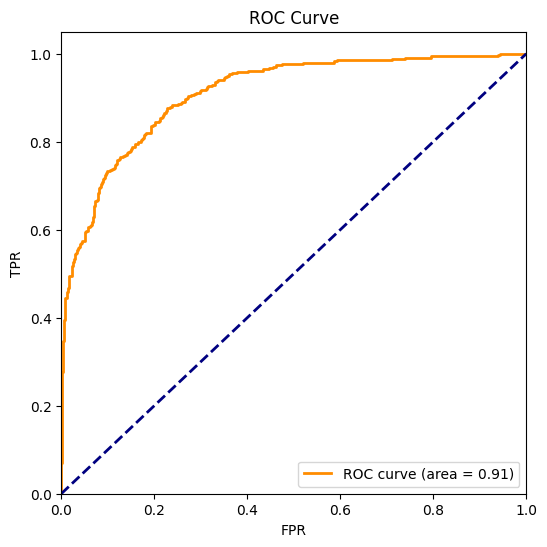

In [26]:
#在测试集上画roc
ROC_loader=DataLoader(dataset=test_dataset, batch_size=1)  #对每个测试集整体画ROC曲线
ROC_test(ROC_loader,model)

In [28]:
#保存模型
torch.save(model.state_dict(),"WGCNA_CNN_model_2_74.6.pth")
print("保存模型状态到model_2_74.6.pth")

保存模型状态到model_2_74.6.pth


In [66]:
#保存模型
torch.save(model.state_dict(),"WGCNA_CNN_model.pth")
print("保存模型状态到model.pth")

保存模型状态到model.pth
